# Imports

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.signal as scs


time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)

In [273]:
df = pd.read_csv("../data/open_meteo_tokyo_multivariative.csv")
df.head()

,time,weather_code,temperature_max,temperature_min,temperature_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1940-01-02,3,3.5,-1.9,0.5,-0.1,-4.9,-3.0,1940-01-01T21:50,1940-01-02T07:38,...,23319.52,0.0,0.0,0.0,0.0,10.0,16.2,21,5.05,0.65
1,1940-01-03,1,9.3,-0.8,3.1,5.9,-4.8,-0.4,1940-01-02T21:51,1940-01-03T07:39,...,31386.91,0.0,0.0,0.0,0.0,17.0,26.6,196,10.72,1.28
2,1940-01-04,1,9.6,1.3,5.0,5.4,-1.9,1.3,1940-01-03T21:51,1940-01-04T07:40,...,31522.01,0.0,0.0,0.0,0.0,17.5,31.3,218,11.43,1.58
3,1940-01-05,1,14.5,-0.4,5.8,10.5,-3.9,2.3,1940-01-04T21:51,1940-01-05T07:41,...,31531.86,0.0,0.0,0.0,0.0,26.6,46.1,240,11.42,1.65
4,1940-01-06,51,10.4,0.4,4.3,8.2,-2.3,1.6,1940-01-05T21:51,1940-01-06T07:42,...,30139.26,0.1,0.1,0.0,1.0,15.2,28.4,12,8.05,0.96


In [274]:
df.isna().sum()

time                           0
weather_code                   0
temperature_max                0
temperature_min                0
temperature_mean               0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

In [275]:
x = np.arange(df.shape[0])
y = np.array(df['temperature_mean'])

coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)

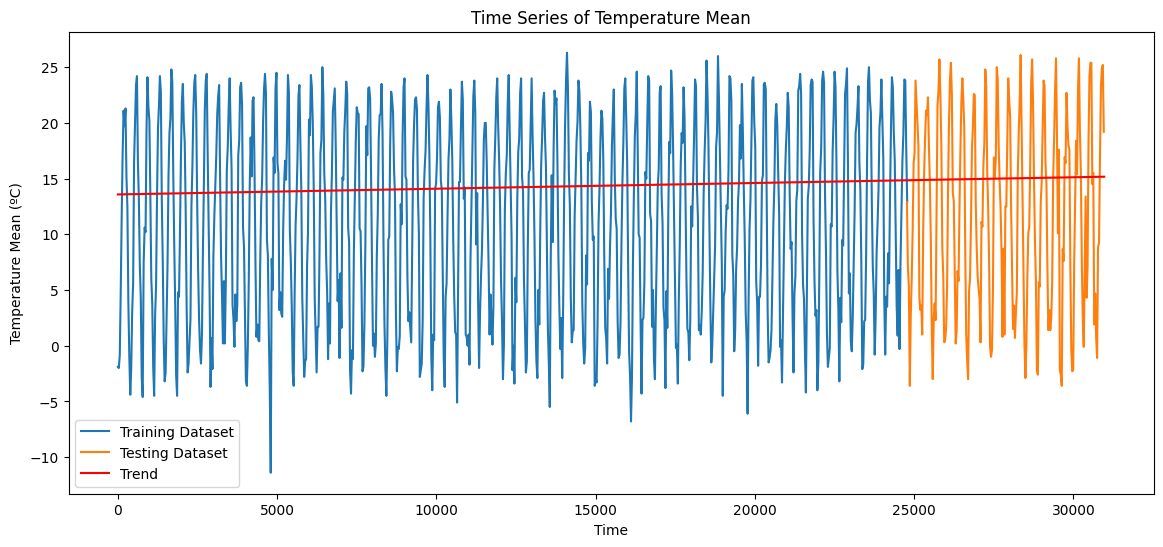

In [276]:
plt.figure(figsize=(14, 6))

plt.plot(df['temperature_min'][:int(df.shape[0] * 0.8)+30:30])
plt.plot(df['temperature_min'][int(df.shape[0] * 0.8)::30])
plt.plot(x, p(x), label='Linear Fit', color='red')

plt.title("Time Series of Temperature Mean")
plt.xlabel("Time")
plt.ylabel("Temperature Mean (ºC)")
plt.legend(["Training Dataset", "Testing Dataset", "Trend"])
plt.show()

TS decomposition models

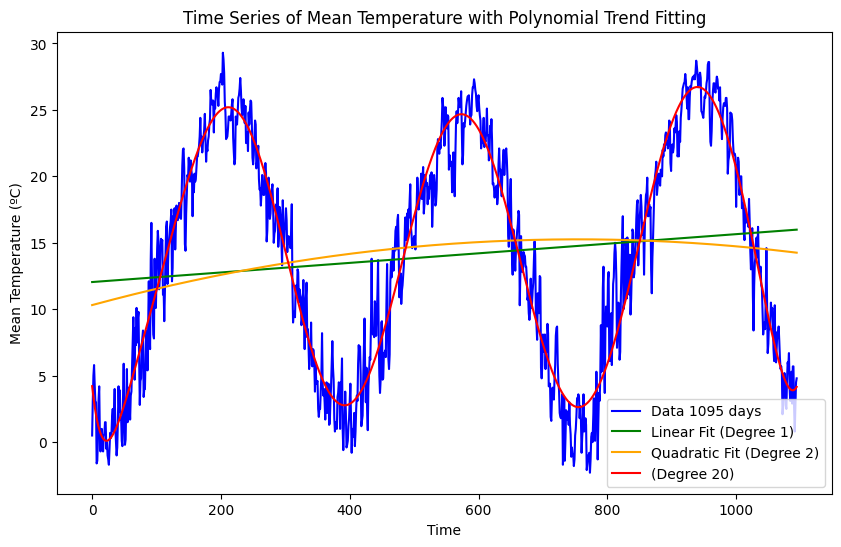

In [277]:
N = 365*3  #3 years
df2 = df[:N]
y = np.array(df2['temperature_mean'])
x = np.arange(len(y))

# Fit a linear polynomial (degree 1)
linear_coefficients = np.polyfit(x, y, 1)
linear_trend = np.poly1d(linear_coefficients)


# Fit a quadratic polynomial (degree 2)
quadratic_coefficients = np.polyfit(x, y, 2)
quadratic_trend = np.poly1d(quadratic_coefficients)


# Fit a polynomial with other degree
n_coefficients = np.polyfit(x, y, 12)
n_trend = np.poly1d(n_coefficients)

# Plotting the original data and polynomial trends
plt.figure(figsize=(10, 6))


plt.plot(df2['temperature_mean'][:df2.shape[0]:], label="Data " + str(N) + " days", color="blue")


# Plot the polynomial fits
plt.plot(x, linear_trend(x), label='Linear Fit (Degree 1)', color='green')
plt.plot(x, quadratic_trend(x), label='Quadratic Fit (Degree 2)', color='orange')
plt.plot(x, n_trend(x), label='(Degree 20)', color='red')

# Add title, labels, and legend
plt.title("Time Series of Mean Temperature with Polynomial Trend Fitting")
plt.xlabel("Time")
plt.ylabel("Mean Temperature (ºC)")
plt.legend()

# Show the plot
plt.show()

Additive model

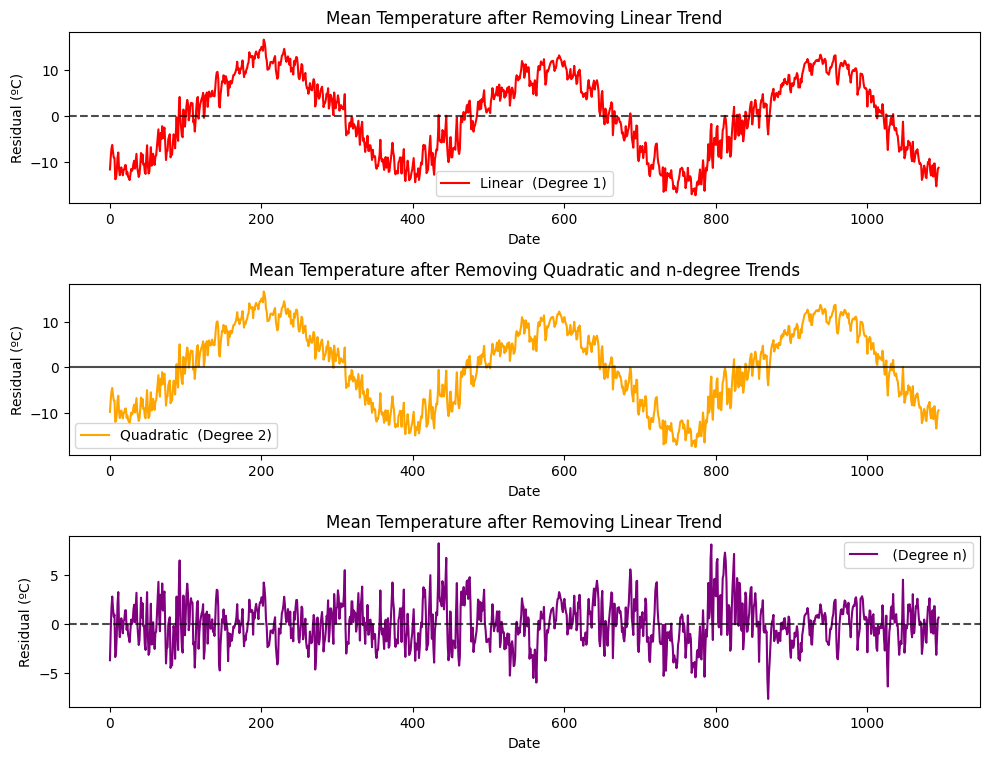

In [278]:
# Subtract the trends from the original time series to get residuals
# additive model
linear_residuals = y - linear_trend(x)
quadratic_residuals = y - quadratic_trend(x)
n_residuals = y - n_trend(x)

# Plotting the original data and residuals
plt.figure(figsize=(10, 10))


# Remove linear trend
plt.subplot(4, 1, 2)
plt.plot(x, linear_residuals, label="Linear  (Degree 1)", color="red")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f"Mean Temperature after Removing Linear Trend")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Remove quadraic trend 
plt.subplot(4, 1, 3)
plt.plot(x, quadratic_residuals, label="Quadratic  (Degree 2)", color="orange", )
plt.axhline(0, color='black', alpha=0.7)
plt.title(f"Mean Temperature after Removing Quadratic and n-degree Trends")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Remove n degree trend
plt.subplot(4, 1, 4)
plt.plot(x, n_residuals, label=" (Degree n)", color="purple",)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f"Mean Temperature after Removing Linear Trend")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Multiplicative Model

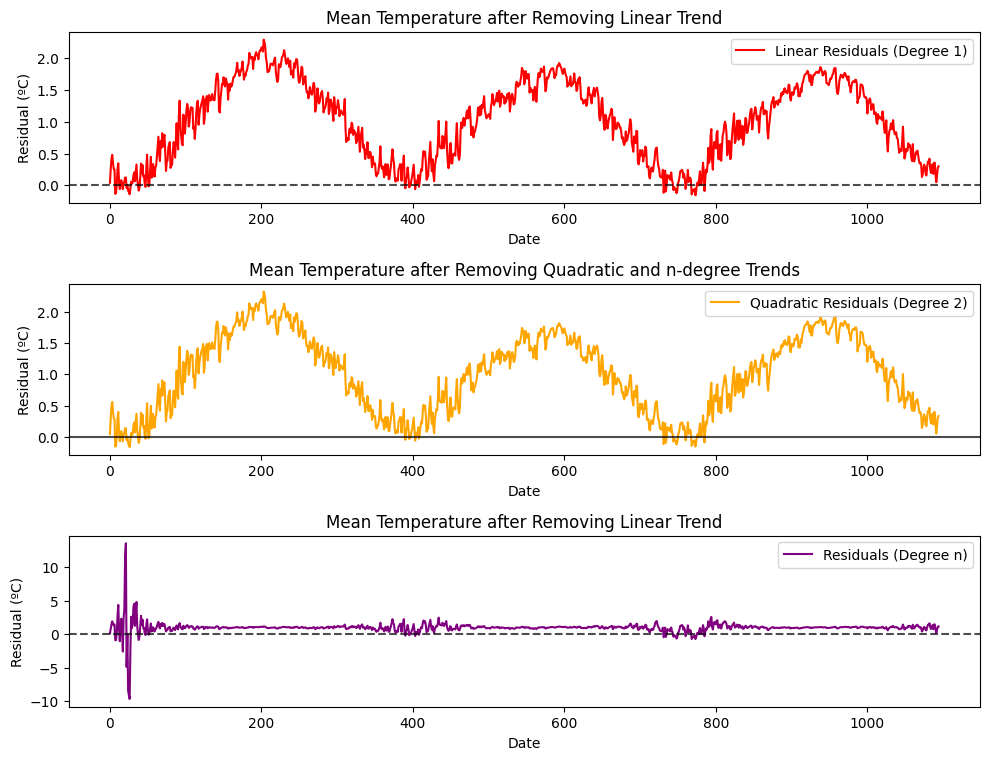

In [279]:
# Divide the trends from the original time series to get residuals
# Multiplicative model
linear_residuals = y / linear_trend(x)
quadratic_residuals = y / quadratic_trend(x)
n_residuals = y / n_trend(x)

# Plotting the original data and residuals
plt.figure(figsize=(10, 10))


# Remove linear trend
plt.subplot(4, 1, 2)
plt.plot(x, linear_residuals, label="Linear Residuals (Degree 1)", color="red")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f"Mean Temperature after Removing Linear Trend")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Remove quadraic trend 
plt.subplot(4, 1, 3)
plt.plot(x, quadratic_residuals, label="Quadratic Residuals (Degree 2)", color="orange", )
plt.axhline(0, color='black', alpha=0.7)
plt.title(f"Mean Temperature after Removing Quadratic and n-degree Trends")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Remove n degree trend
plt.subplot(4, 1, 4)
plt.plot(x, n_residuals, label="Residuals (Degree n)", color="purple",)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f"Mean Temperature after Removing Linear Trend")
plt.xlabel("Date")
plt.ylabel("Residual (ºC)")
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Moving Average smoothing

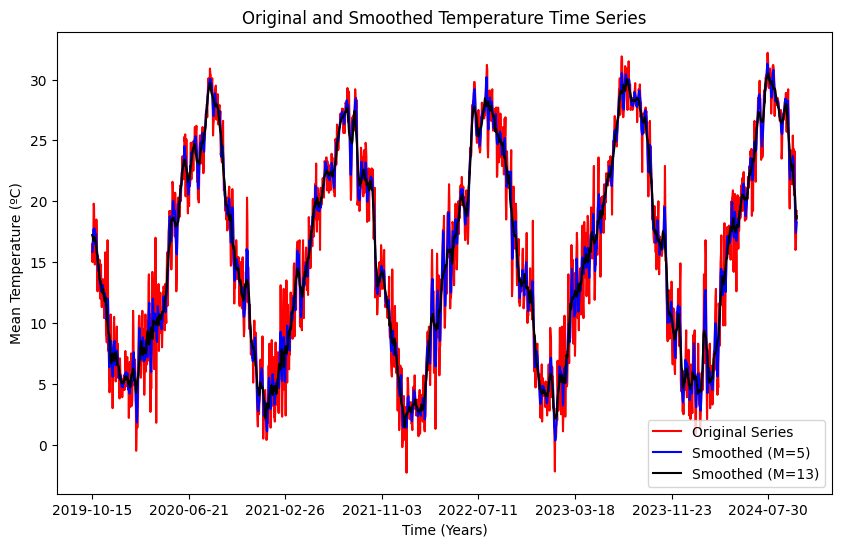

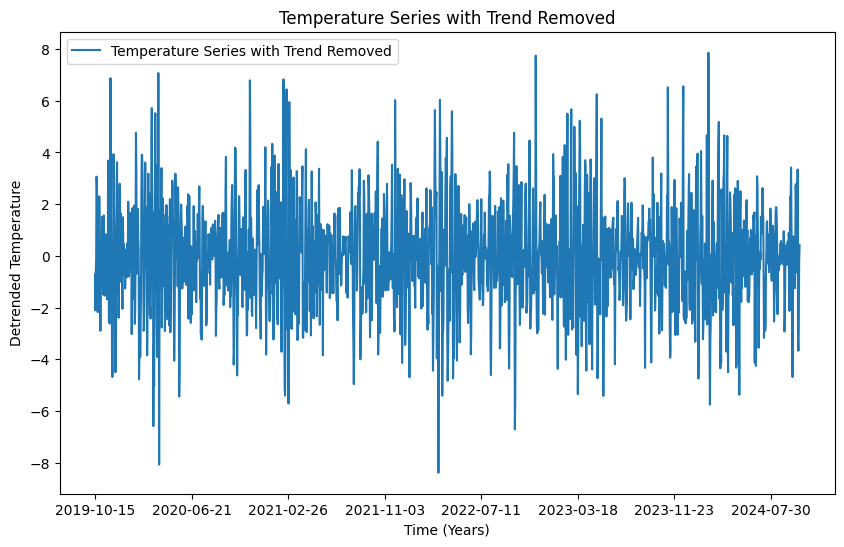

In [280]:
def maSmooth(TSeries,omega,data_aug=False):
    M=omega.shape[0]
    lag=int(np.floor((M-1)/2))
    
    if data_aug: #If smooted TS should have the same number of samples
        #TSeriesAug=TSeries.concat(np.flip(TSeries[-lag:]))
        #TSeriesAug=np.flip(TSeries[0:lag]).append(TSeriesAug)
        
        TSeriesAug = pd.concat([TSeries.iloc[lag:0:-1], TSeries, TSeries.iloc[-1:-lag-1:-1]])
    else:
        TSeriesAug=TSeries
        
    nf=range(lag,TSeriesAug.size-lag)
    xf=np.zeros(TSeriesAug.size-2*(lag)).astype('float')
    for n in nf:
        xf[n-lag]=(1/float(sum(omega)))*np.sum(np.multiply(TSeriesAug[n-lag:n+lag+1],omega))
    xf=pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size-lag],name="Smoothed TS with M="+str(M))
    
    return xf


# Convert temperature_mean to a time series
tempTS = pd.Series(data=np.array(df["temperature_mean"]), index=df["time"], name="Mean Temperature TS")

#LAST n days
tempTS = tempTS[-365*5:]

# Apply Moving Average with M=5
M = 5
omega = np.ones(M) * (1 / float(M))  # Uniform weights
smooth5 = maSmooth(tempTS, omega, data_aug=True)

# Apply Moving Average with M=13
M = 13
omega = np.ones(M) * (1 / float(M))
smooth13 = maSmooth(tempTS, omega, data_aug=True)

# Plot the original and smoothed temperature series
plt.figure(figsize=(10, 6))
ax = tempTS.plot(color='r', legend=True, label="Original Series")
smooth5.plot(color='b', legend=True, label="Smoothed (M=5)")
smooth13.plot(color='k', legend=True, label="Smoothed (M=13)")
ax.set_ylabel('Mean Temperature (ºC)', fontdict={'fontsize':10})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':10})
plt.title("Original and Smoothed Temperature Time Series")
plt.show()

# Remove trend using smoothed series with M=13 (as trend)
tempNoTrend = tempTS - smooth13  
tempNoTrend.name = "Temperature Series with Trend Removed"

# Plot the detrended series
plt.figure(figsize=(10, 6))
ax = tempNoTrend.plot(legend=True)
ax.set_ylabel('Detrended Temperature', fontdict={'fontsize':10})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':10})
plt.title("Temperature Series with Trend Removed")
plt.show()


#TO CREATE A MONTLY SERIES
#df3 = df
#df3['time'] = pd.to_datetime(df3['time'])  # Convert to datetime format
#
## Set the date column as the index (required for resampling)
#df3.set_index('time', inplace=True)
#
## Resample to monthly averages (mean of temperature per month)
#monthly_avg = df3['temperature_mean'].resample('M').mean()



### LOWESS approach

Using sm library

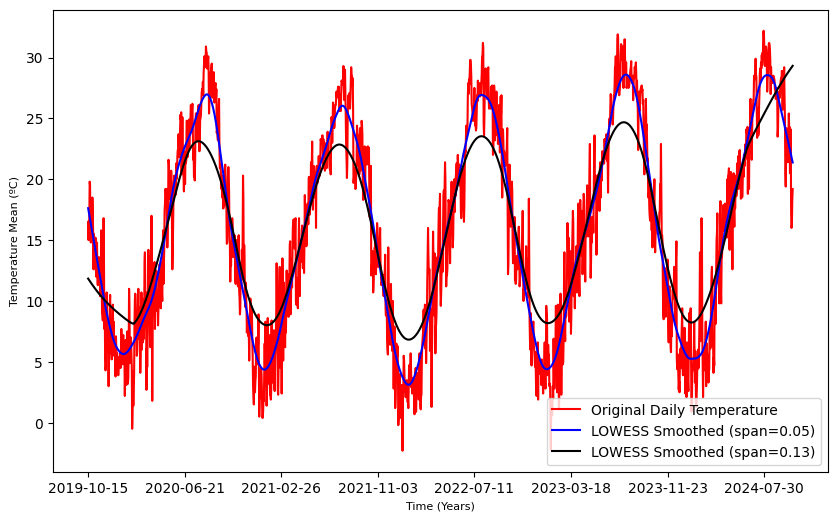

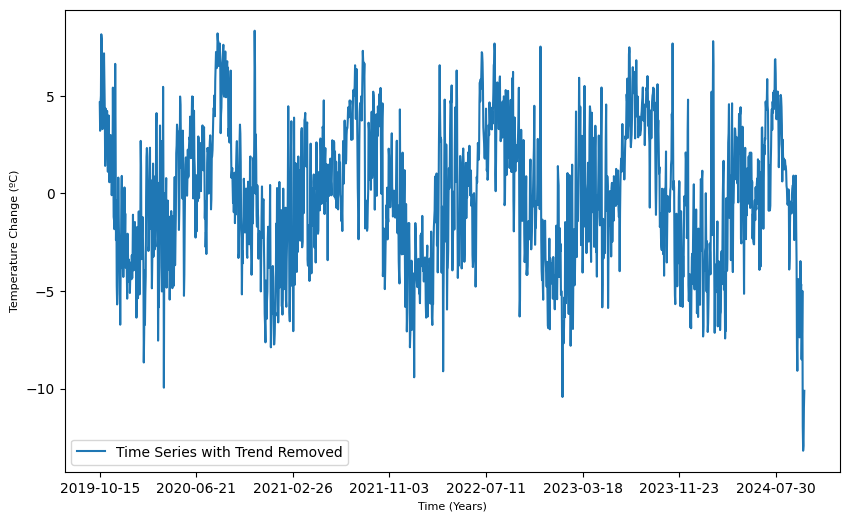

In [281]:
# Apply LOWESS smoothing with different spans (equivalent to M)
span_5 = 0.05  # Adjusted for smoothness, equivalent to M=5
span_13 = 0.13  # Adjusted for smoothness, equivalent to M=13

# Applying LOWESS with different spans
smooth5 = sm.nonparametric.lowess(tempTS, np.arange(len(tempTS)), frac=span_5, return_sorted=False)
smooth13 = sm.nonparametric.lowess(tempTS, np.arange(len(tempTS)), frac=span_13, return_sorted=False)

# Plot the original series and smoothed series
plt.figure(figsize=(10, 6))

# Original data plot
ax = tempTS.plot(color='r', legend=True, label="Original Daily Temperature")

# LOWESS smoothing plot with different spans
plt.plot(tempTS.index, smooth5, color='b', label=f"LOWESS Smoothed (span={span_5})")
plt.plot(tempTS.index, smooth13, color='k', label=f"LOWESS Smoothed (span={span_13})")

# Labels and formatting
ax.set_ylabel('Temperature Mean (ºC)', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})
plt.legend()

# Second plot: Removing the trend using smoothed data
plt.figure(figsize=(10, 6))

psNoTrend1 = tempTS - smooth13
psNoTrend1.name = "Time Series with Trend Removed"
ax = psNoTrend1.plot(legend=True)
ax.set_ylabel('Temperature Change (ºC)', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})

plt.show()

Teacher's approach

C:\Users\tomas\AppData\Local\Temp\ipykernel_2744\1289780612.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xf[k]=res_wls.params[1]*k+res_wls.params[0]


Text(0.5, 0, 'Time (Years)')

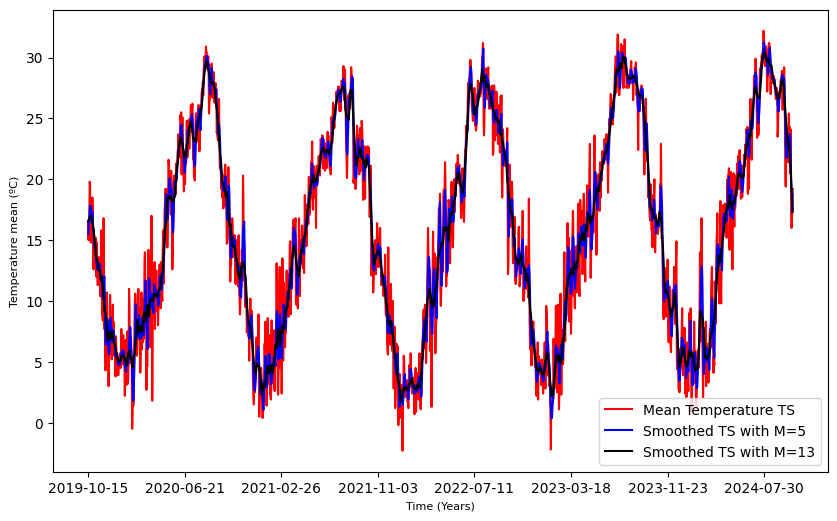

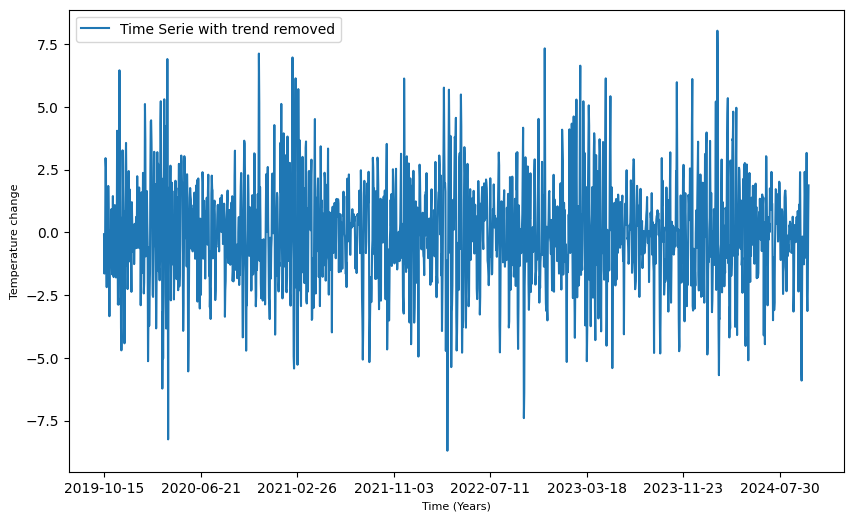

In [282]:
def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<=lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:TSeries.size]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:TSeriesE.size]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag-1:k+lag]
            if not timePass:
                winE=TSeriesE[k-lag-1:k+lag]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k+res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf





M=5
smooth5=lowess(tempTS)

M=13
smooth13=lowess(tempTS,span=M)

plt.figure(figsize=(10, 6))

ax=tempTS.plot(color='r',legend=True)
smooth5.plot(color='b',legend=True)
smooth13.plot(color='k',legend=True)
ax.set_ylabel('Temperature mean (ºC)', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})


plt.figure(figsize=(10, 6))

psNoTrend=tempTS - smooth13
psNoTrend.name="Time Serie with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Temperature change', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})

### Seasonality assessment

Discrete Fourier Transform (DFT) computation

Text(0, 0.5, 'Normalized Power Spectrum (A.U.)')

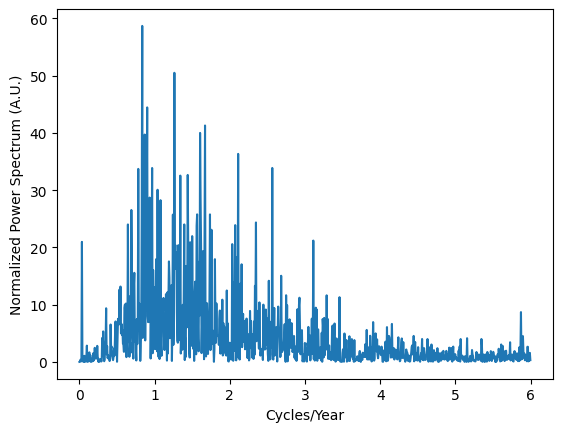

In [283]:
fTS=(np.abs(np.fft.rfft(psNoTrend-psNoTrend.mean()))**2/psNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=12 #12 samples/year
f=np.fft.rfftfreq(psNoTrend.size, d=1/samp_freq)
plt.figure();
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")

Seasonality assessment by filtering

Text(0.5, 0, 'Time (Years)')

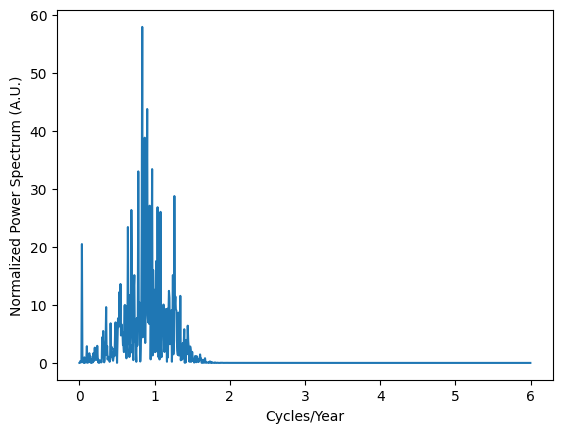

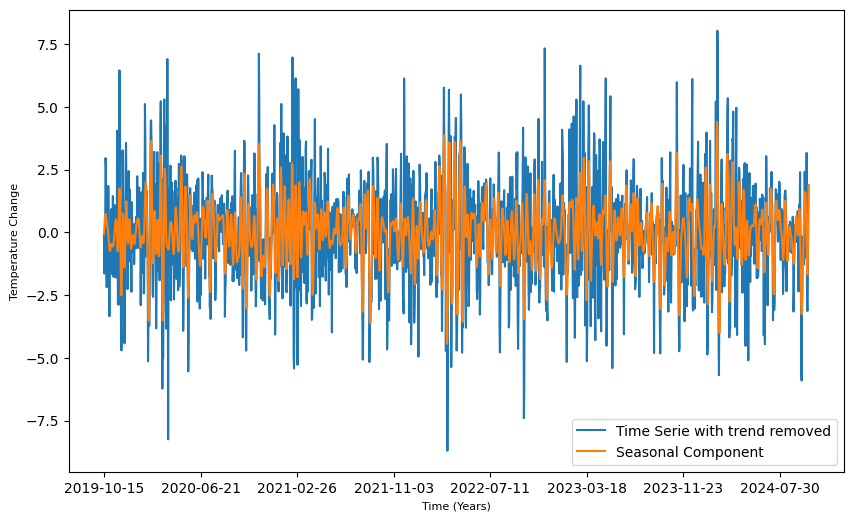

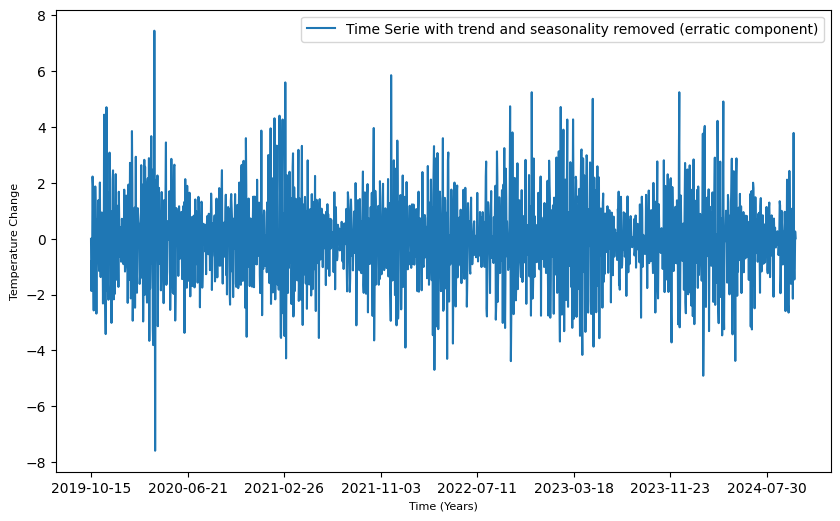

In [290]:
sos=scs.butter(N=5,fs=12,Wn=[1.4],btype='lowpass',output='sos')

Seasonal = scs.sosfiltfilt(sos,psNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/psNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=12 #12 samples/year
f=np.fft.rfftfreq(psNoTrend.size, d=1/samp_freq)
plt.figure();
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=tempTS.index,name="Seasonal Component")
plt.figure(figsize=(10, 6))
ax=psNoTrend.plot(legend=True)
SeaTS.plot(legend=True)
ax.set_ylabel('Temperature Change', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})

#Remove seasonal component by assuming the multiplicative model
psNoTrendNoSeas=psNoTrend - SeaTS
psNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(10, 6))
ax=psNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('Temperature Change', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})


Seasonality assessment by epoch averaging

5


Text(0.5, 0, 'Time (Years)')

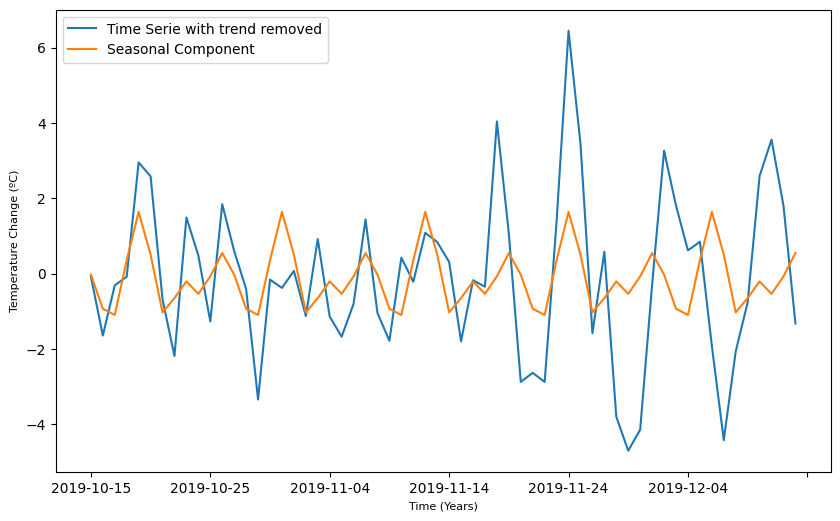

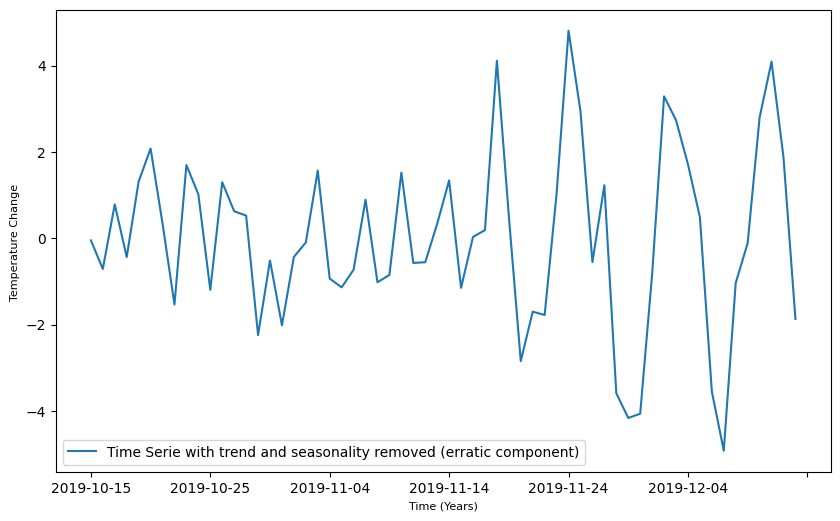

In [301]:
S=12

N=psNoTrend.size

C=int(np.floor(N/S/30))
print(C)

psNoTrend=psNoTrend[0:C*S]

reshTS=np.array(psNoTrend).reshape((C,S))#Reshape 1 column per month

ac=np.tile(np.mean(reshTS,axis=0),(C,))
SeaTS=pd.Series(data=ac,index=psNoTrend.index,name="Seasonal Component")

plt.figure(figsize=(10, 6))
ax=psNoTrend.plot(legend=True)
SeaTS.plot(legend=True)
ax.set_ylabel('Temperature Change (ºC)', fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)', fontdict={'fontsize':8})


#Remove seasonal component by assuming the additive model
psNoTrendNoSeas=psNoTrend - SeaTS
psNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(10, 6))
ax=psNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('Temperature Change ',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})